In [1]:
# Parameters
current_time = "20_3_2022__15_32_41"
batch_id = 2
source_data = ".//data//source//Grocery, Fruits and Dry Fruits.csv"
source_notebook = ".//notebooks//input//Grocery_Data_Preprocessing.ipynb"
preprocessed_data = ".//data//processed//20_3_2022__15_32_41_Grocery, Fruits and Dry Fruits.csv"
unprocessed_data = ".//data//unprocessed//20_3_2022__15_32_41_unprocessed_Grocery, Fruits and Dry Fruits.csv"


# Reading the data into python

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
import pandas as pd
import numpy as np

inventory_df = pd.read_csv(open(source_data))
inventory_df.sample(5)

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
8276,Bakery Cakes Dairy,Gourmet Breads,Groceries,Fresho Signature,"Bread - Sour Dough With Olives, Pre Sliced",300 g,75.0,202220277,https://www.bigbasket.com/media/uploads/p/s/40...,4.7,27
16059,Snacks Branded Foods,Ready To Cook Eat,Groceries,Haldirams,Ready To Eat - Dal Makhani,300 g Carton,100.0,202228060,https://www.bigbasket.com/media/uploads/p/s/70...,4.1,53
2394,Foodgrains Oil Masala,Dals Pulses,Groceries,Manna,Proso Millet - Barri/Panivaragu/Varigulu/Baragu,500 g 0,120.0,202214395,https://www.bigbasket.com/media/uploads/p/s/40...,4.9,54
5391,Kitchen Garden Pets,Gardening,Groceries,Natures Plus,Hand Trowel - Big,1 pc,180.0,202217392,https://www.bigbasket.com/media/uploads/p/s/40...,4.2,74
7747,Foodgrains Oil Masala,Dry Fruits,Dry Fruits,Happilo,Black Raisins - Premium Afghani Seedless,2x250 g Multipack,450.0,202219748,https://www.bigbasket.com/media/uploads/p/s/12...,4.1,30


In [4]:
print('Shape before deleting duplicate values:', inventory_df.shape)

# Removing duplicate rows if any
inventory_df = inventory_df.drop_duplicates()
print('Shape After deleting duplicate values:', inventory_df.shape)

# Printing sample data
inventory_df.sample(5)

Shape before deleting duplicate values: (17607, 11)
Shape After deleting duplicate values: (17607, 11)


,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
9439,Snacks Branded Foods,Spreads Sauces Ketchup,Groceries,Tex Mex Salsalito,Dip Mix - Cheese,17 g Pouch,70.0,202221440,https://www.bigbasket.com/media/uploads/p/s/20...,4.5,30
5707,Gourmet World Food,Chocolates Biscuits,Groceries,Lindt,70% Cocoa Dark,100 g,450.0,202217708,https://www.bigbasket.com/media/uploads/p/s/40...,4.0,32
6977,Bakery Cakes Dairy,Dairy,Groceries,Nestle A+,Nourish Dahi,200 g Cup,35.0,202218978,https://www.bigbasket.com/media/uploads/p/s/29...,4.8,57
17579,Foodgrains Oil Masala,Masalas Spices,Groceries,HappyChef,Parsley,12 g,109.0,202229580,https://www.bigbasket.com/media/uploads/p/s/40...,4.0,68
4446,Beauty Hygiene,Hair Care,Groceries,Revlon,Color N Care Permanent Hair Color Cream - Burg...,176.38 g,200.0,202216447,https://www.bigbasket.com/media/uploads/p/s/40...,4.0,86


# Defining the problem statement

#### Create a predictive model which gives relevant products recommendations

Predictors: Category, Sub Category, Brand Name, Product Rating, Name

# Basic Data Exploration

In [5]:
# Looking at the sample rows in the data
inventory_df.sample(5)

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
11617,Cleaning Household,Bins Bathroom Ware,Groceries,Aristo,"Plastic Spray Bottle - Assorted Colour, 1 L",1 pc,74.0,202223618,https://www.bigbasket.com/media/uploads/p/s/40...,4.4,79
1743,Gourmet World Food,Oils Vinegar,Groceries,ORGANIC INDIA,Apple Cider Vinegar,500 ml Bottle,595.0,202213744,https://www.bigbasket.com/media/uploads/p/s/40...,4.8,91
5023,Gourmet World Food,Cereals Breakfast,Groceries,True Elements,Butterscotch Muesli 400 g Container + Muesli C...,Combo (2 Items),515.0,202217024,https://www.bigbasket.com/media/uploads/p/s/12...,4.8,46
15521,Bakery Cakes Dairy,Cookies Rusk Khari,Groceries,Tasties,French Heart,200 g,115.0,202227522,https://www.bigbasket.com/media/uploads/p/s/40...,5.0,91
12844,Beauty Hygiene,Deodorant Fragrance,Groceries,Yardley London,London Rose Deodorant Roll On Antiperspirant -...,50 ml,199.0,202224845,https://www.bigbasket.com/media/uploads/p/s/40...,4.3,57


In [6]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17607 entries, 0 to 17606
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Category               17607 non-null  object 
 1   Sub Category           17607 non-null  object 
 2   Simplified Category    17607 non-null  object 
 3   Brand Name             17607 non-null  object 
 4   Product Name           17607 non-null  object 
 5   Weight                 17607 non-null  object 
 6   MRP/Unit               17607 non-null  float64
 7   Product ID             17607 non-null  int64  
 8   Image URL              17607 non-null  object 
 9   Rating                 17607 non-null  float64
 10  No of Users Purchased  17607 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.6+ MB


In [7]:
# Looking at the descriptive statistics of the data
inventory_df.describe(include='all')

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased
count,17607,17607,17607,17607,17607,17607,17607.000000,1.760700e+04,17607,17607.000000,17607.000000
unique,10,89,3,1510,11059,2909,NaN,NaN,12073,NaN,NaN
top,Gourmet World Food,Spreads Sauces Ketchup,Groceries,Fresho,Soft Drink,1 pc,NaN,NaN,https://www.bbassets.com/static/images/product...,NaN,NaN
freq,2655,432,16924,941,23,1227,NaN,NaN,17,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,348.103398,2.022208e+08,NaN,4.501465,62.467996
std,NaN,NaN,NaN,NaN,NaN,NaN,521.635340,5.082847e+03,NaN,0.291782,21.987885
min,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.022120e+08,NaN,4.000000,25.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,95.000000,2.022164e+08,NaN,4.300000,43.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,199.000000,2.022208e+08,NaN,4.500000,63.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,399.000000,2.022252e+08,NaN,4.700000,81.000000


In [8]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
inventory_df.nunique()

Category                    10
Sub Category                89
Simplified Category          3
Brand Name                1510
Product Name             11059
Weight                    2909
MRP/Unit                  1090
Product ID               17607
Image URL                12073
Rating                      11
No of Users Purchased       76
dtype: int64

# Basic Data Exploration Results

Based on the basic exploration above, we can create a simple report of the data, noting down the observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created.

- Category     : Selected. Categorical.
- Sub Category : Selected. Categorical.
- Brand Name   : Selected. Categorical.
- Product Name: Selected. Categorical.
- Name         : Selected. Categorical.
- Weight       : Selected. Continuous.
- MRP/Unit     : Selected. Continuous.
- Qnty         : Selected. Continuous.
- Unit Qnty    : Selected. Continuous.
- Cost Price   : Selected. Continuous.
- Product ID   : Selected. Continuous.
- Product rating : Selected. Continuous.

# Visual Exploratory Data Analysis

Categorical variables: Bar plot

Continuous variables: Histogram

## Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

In [9]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(50,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

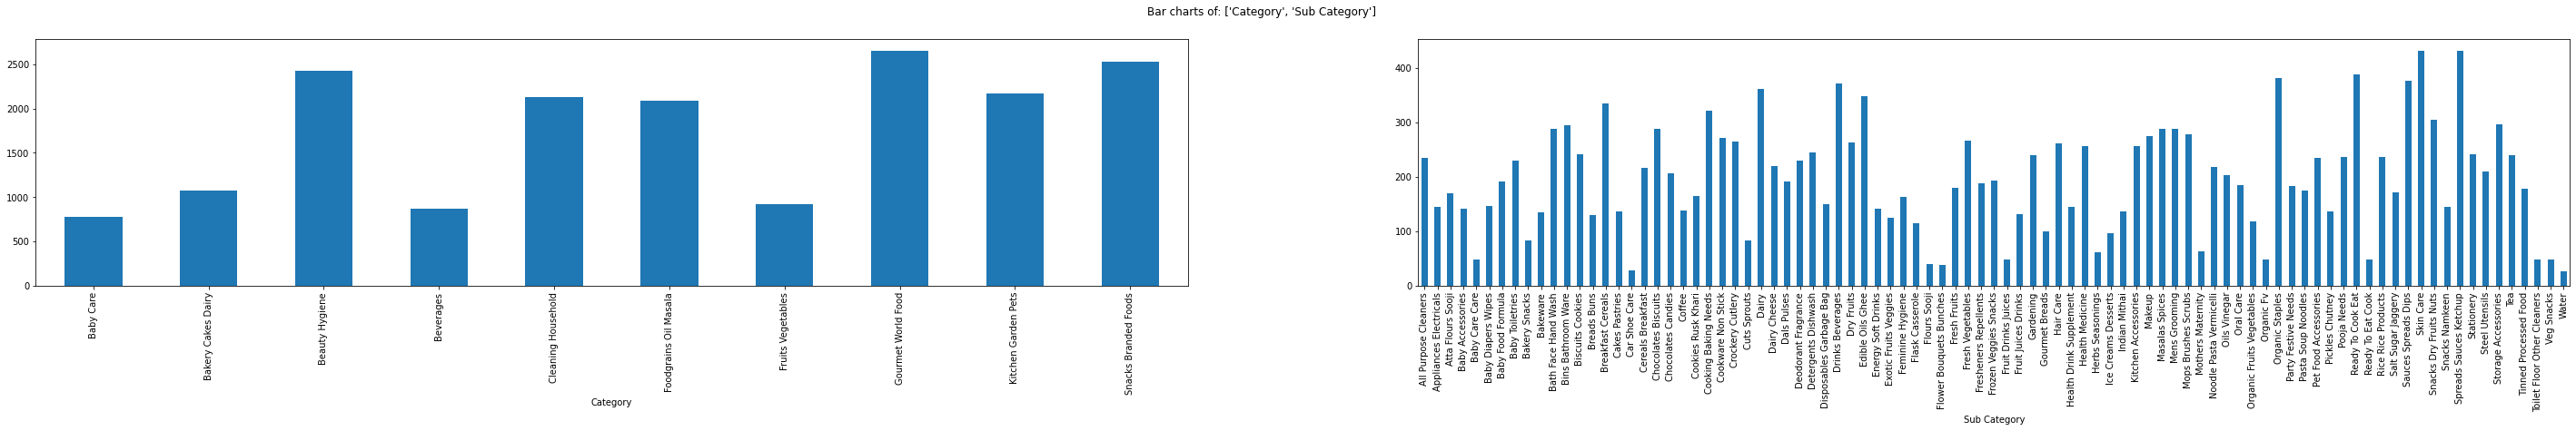

In [10]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=inventory_df, 
              colsToPlot=['Category', 'Sub Category'])

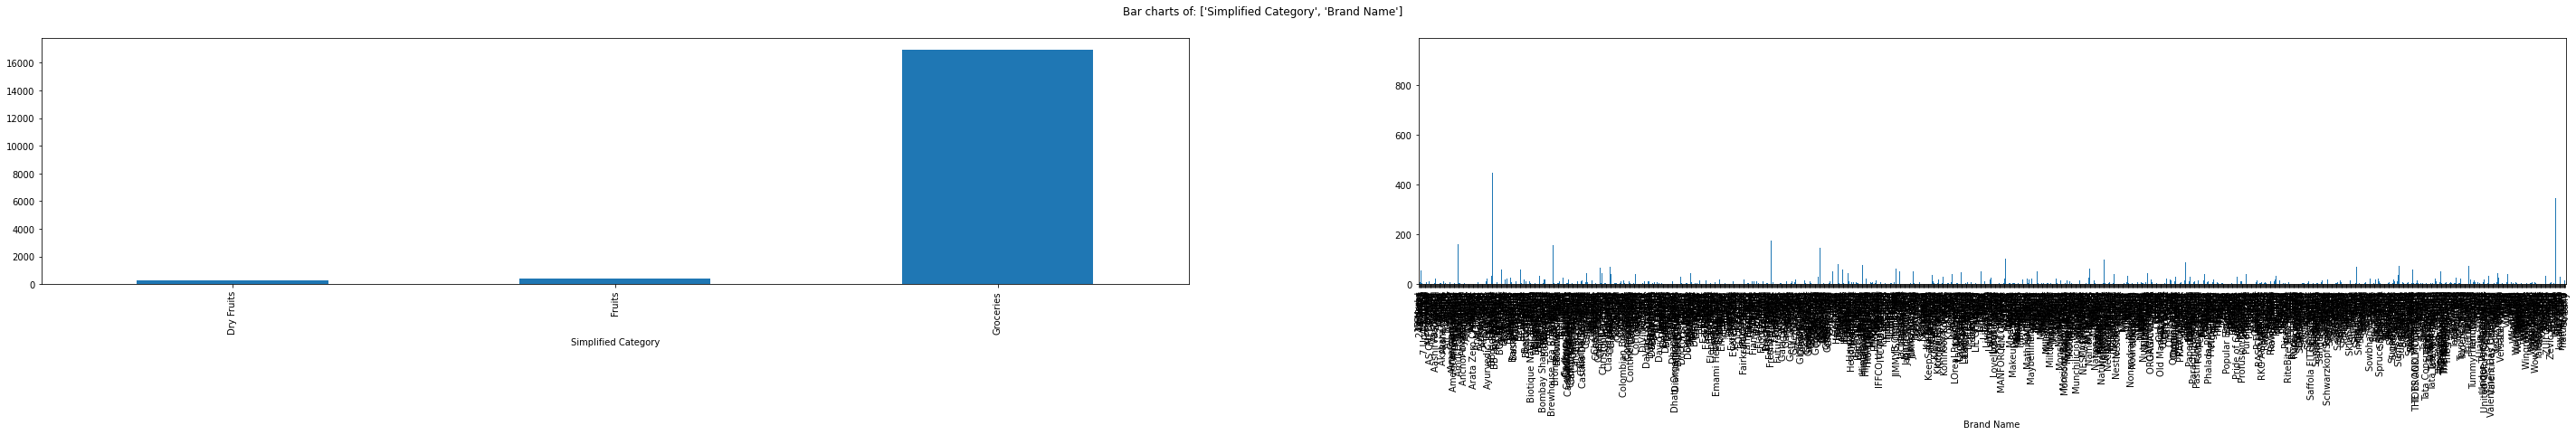

In [11]:
#####################################################################
# Calling the function for 5 columns
PlotBarCharts(inpData=inventory_df, 
              colsToPlot=['Simplified Category', 'Brand Name'])

# Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In this data, all the categorical columns except "Brand Name", "Name" and "Product Name" have satisfactory distribution for machine learning.

# Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'MRP/Unit'}>,
        <AxesSubplot:title={'center':'Rating '}>],
       [<AxesSubplot:title={'center':'No of Users Purchased'}>,
        <AxesSubplot:>]], dtype=object)

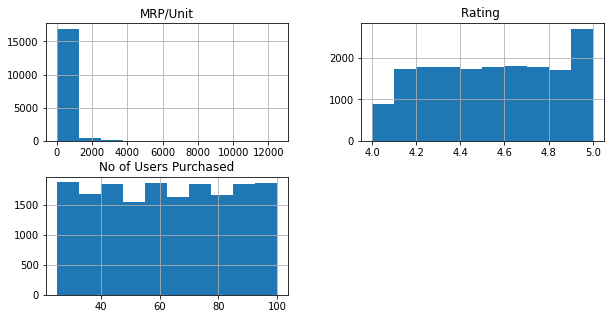

In [12]:
# Plotting histograms of multiple columns together
inventory_df.hist(['MRP/Unit', 'Rating ', 'No of Users Purchased'], figsize=(10, 5))

In [13]:
inventory_df.columns

Index(['Category', 'Sub Category', 'Simplified Category', 'Brand Name',
       'Product Name', 'Weight', 'MRP/Unit', 'Product ID ', 'Image URL',
       'Rating ', 'No of Users Purchased'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Product ID '}>]], dtype=object)

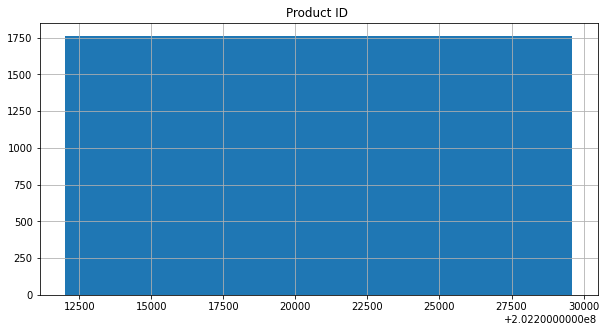

In [14]:
# Plotting histograms of multiple columns together

inventory_df.hist(['Product ID '], figsize=(10,5))

# Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

Selected Continuous Variables:

- MRP/Unit   : Selected. Slightly skewed distribution, acceptable.
- Qnty       : Selected. Slightly skewed distribution, acceptable.
- Unit Qnty  : Selected. Skewed distribution, not acceptable.
- Cost Price : Selected. Slightly skewed distribution, acceptable.


# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

Why I should treat the outliers?

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data.

- Option-1: Delete the outlier Records. Only if there are just few rows lost.
- Option-2: Impute the outlier values with a logical business value

In this data all the continuous variables have slightly skewed distribution, which is acceptable, hence no outlier treatment is required.

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

- Delete the missing value rows if there are only few records
- Impute the missing values with MEDIAN value for continuous variables
- Impute the missing values with MODE value for categorical variables
- Interpolate the values based on nearby values
- Interpolate the values based on business logic

In [15]:
# Finding how many missing values are there for each column
inventory_df.isnull().sum()

Category                 0
Sub Category             0
Simplified Category      0
Brand Name               0
Product Name             0
Weight                   0
MRP/Unit                 0
Product ID               0
Image URL                0
Rating                   0
No of Users Purchased    0
dtype: int64

In [16]:
error_records_df = inventory_df[inventory_df.isnull().any(axis=1)]
error_records_df.to_csv(unprocessed_data, index=False)
error_records_df.head()

,Category,Sub Category,Simplified Category,Brand Name,Product Name,Weight,MRP/Unit,Product ID,Image URL,Rating,No of Users Purchased


In [17]:
inventory_df.replace('', np.nan, inplace=True)

In [18]:
inventory_df.dropna(inplace=True)

# Finding how many missing values are there for each column
inventory_df.isnull().sum()

Category                 0
Sub Category             0
Simplified Category      0
Brand Name               0
Product Name             0
Weight                   0
MRP/Unit                 0
Product ID               0
Image URL                0
Rating                   0
No of Users Purchased    0
dtype: int64

All the missing values are removed now.

# Data Cleansing

In [19]:
# Removing the leading and trailing spaces of columns
inventory_df.columns = inventory_df.columns.str.strip()

In [20]:
inventory_df.columns

Index(['Category', 'Sub Category', 'Simplified Category', 'Brand Name',
       'Product Name', 'Weight', 'MRP/Unit', 'Product ID', 'Image URL',
       'Rating', 'No of Users Purchased'],
      dtype='object')

# Find Correalation between attributes

In [21]:
# To find the correlation among
# the columns using pearson method
inventory_df.corr(method ='pearson')

,MRP/Unit,Product ID,Rating,No of Users Purchased
MRP/Unit,1.000000,-0.001637,0.000707,-0.001141
Product ID,-0.001637,1.000000,-0.000728,0.007990
Rating,0.000707,-0.000728,1.000000,0.002368
No of Users Purchased,-0.001141,0.007990,0.002368,1.000000


# Save the file into local machine

In [22]:
inventory_df.to_csv(preprocessed_data, index=False)